In [1]:
import pandas as pd
import numpy as np
from itertools import tee, islice, chain

In [2]:
data = pd.read_excel('DataKubisKur.xlsx')

In [9]:
data.values[:,1]

array([46310. , 15831. , 54384.2, 67970. , 67720.1, 65048.3, 66469. ,
        9237. , 28880. , 31306. , 40356. , 49745. , 55478. , 63627. ,
       47676. , 39616. , 57919. , 58449. , 66520. , 50453. , 56136. ,
       59868. ])

In [14]:
type(data.values[:,0][0])

numpy.float64

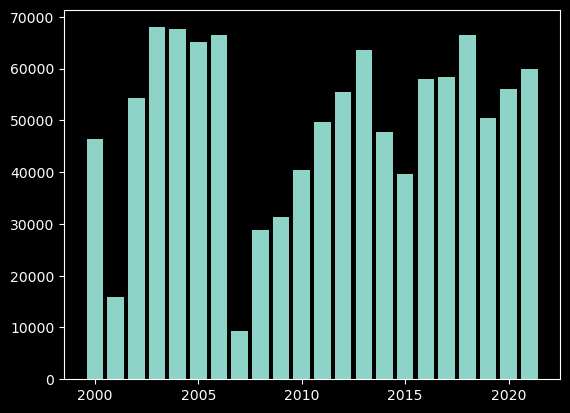

In [21]:
import matplotlib.pyplot as plt
# plt.figure(figsize=(25,25), dpi=100)
plt.bar(data.values[:,0],data.values[:,1])
plt.show()

In [3]:
def previous_and_next(some_iterable):
    prevs, items, nexts = tee(some_iterable, 3)
    prevs = chain([None], prevs)
    nexts = chain(islice(nexts, 1, None), [None])
    return zip(prevs, items, nexts)

In [4]:
def labeling(produksi:list[int|float]|np.ndarray):
    min, max = produksi.min(), produksi.max()
    range_data = (max - min)/3
    label = []
    for x in produksi:
        if x < min+range_data:
            label.append('S')
        elif min+range_data <= x < min+range_data*2:
            label.append('C')
        elif x > min+range_data*2:
            label.append('B')
    return np.array(label)

In [5]:
def probabilitas_awal(label:np.ndarray):
    unique_val, count = np.unique(label,return_counts=True)
    count = [round(x/count.sum(),4) for x in count]
    return np.flip(unique_val), np.flip(count)

In [8]:
def matrix_transisi(label:np.ndarray):
    transisi = np.zeros((3,3))
    for _, item, nxt in previous_and_next(label):
        if nxt is None :
            continue
        ps = ['S','C','B'].index(item)
        pd = ['S','C','B'].index(nxt)
        transisi[ps][pd] += 1
    for i,y in enumerate(transisi):
        row_total = y.sum()
        for j,x in enumerate(y):
            transisi[i][j] = round(x/row_total,4)
    return transisi

In [100]:
def find_steady_state(prob_awal:np.ndarray,transisi:np.ndarray,max_iteration:int=100):
    new_prob = [round(x,4) for x in np.matmul(prob_awal,transisi)]
    prev_val,streak,i = new_prob,0,0
    while i < max_iteration:
        new_prob = [round(x,4) for x in np.matmul(new_prob,transisi)]
        if np.all(np.equal(prev_val,new_prob)):
            streak += 1
        else:
            streak = 0

        if streak > 3:
            return True, new_prob
        
        prev_val = new_prob
        i += 1

    return False, None

In [98]:
data = pd.read_excel('DataKubisKur.xlsx')
tahun = data.values[:,0]
produksi = data.values[:,1]
a = labeling(produksi)
label, prob_a = probabilitas_awal(a)
transisi = matrix_transisi(a)
find_steady_state(prob_a,transisi)